In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import load_digits, load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC, LinearSVC
from svm import SVC as svc

# Breast cancer dataset(binary classification)

In [3]:
cancer_ds = load_breast_cancer()

In [4]:
X_train, X_test, y_train, y_test = train_test_split(cancer_ds.data, cancer_ds.target, test_size=0.3, random_state=17)

In [5]:
slr = StandardScaler().fit(X_train)

In [6]:
X_train_scaled = slr.transform(X_train)
X_test_scaled = slr.transform(X_test)

# Sklearn svm classifier

## Linear Kernel

In [7]:
svm_lin = SVC(random_state=17, kernel='linear')

In [8]:
svm_lin.fit(X_train_scaled, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=17, shrinking=True, tol=0.001,
    verbose=False)

In [9]:
print("W: ", svm_lin.coef_)
print("b: ", svm_lin.intercept_)
print("Support Vectors: ", svm_lin.support_vectors_)
print("Indices of Support Vectors: ", svm_lin.support_)
print('Number of support vectors for each class = ', svm_lin.n_support_)
print('Coefficients of the support vector in the decision function = ', np.abs(svm_lin.dual_coef_))

W:  [[-0.04494644 -0.15009458  0.02137894 -0.1349809   0.09809281  0.52118771
  -0.91160566 -1.3071541   0.11188634 -0.19634981 -1.08271333  0.36427991
  -0.39441344 -0.96500015 -0.03692257  0.67518342 -0.38092058 -0.0673874
   0.42607686  0.93103486 -0.87742211 -1.03115021 -0.42525832 -0.86753428
  -0.21653896  0.55487856 -0.95961779 -0.51192028 -0.67588717 -0.61033067]]
b:  [0.29727483]
Support Vectors:  [[ 2.84549803e-01  1.37367264e+00  1.87087949e-01  1.62765134e-01
  -1.77202302e-01 -1.00533722e+00 -8.25438919e-01 -5.14474346e-01
  -9.09082848e-01 -1.07423524e+00  2.90160725e+00  2.00476186e+00
   2.63226635e+00  1.39675556e+00 -1.34109186e-02 -8.30020299e-01
  -4.18183855e-01  1.37251502e+00 -1.54555475e+00 -7.39315550e-01
  -2.55260249e-01 -5.14642066e-02 -3.38887997e-01 -3.07897590e-01
  -1.64184424e+00 -1.28510886e+00 -1.19919283e+00 -1.30933370e+00
  -2.17840084e+00 -1.57303480e+00]
 [-6.82555711e-02 -7.58189064e-01 -3.42643389e-02 -1.78487203e-01
   3.00438631e-01  5.157708

In [10]:
preds_lin = svm_lin.predict(X_test_scaled)

In [11]:
accuracy_score(y_test, preds_lin)

0.9590643274853801

In [12]:
print(classification_report(y_test, preds_lin))

              precision    recall  f1-score   support

           0       0.98      0.90      0.94        61
           1       0.95      0.99      0.97       110

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.95       171
weighted avg       0.96      0.96      0.96       171



## Polynomial

In [13]:
svm_poly = SVC(random_state=17, kernel='poly')

In [14]:
svm_poly.fit(X_train_scaled, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=17, shrinking=True, tol=0.001,
    verbose=False)

In [15]:
print("b: ", svm_poly.intercept_)
print("Support Vectors: ", svm_poly.support_vectors_)
print("Indices of Support Vectors: ", svm_poly.support_)
print('Number of support vectors for each class = ', svm_poly.n_support_)
print('Coefficients of the support vector in the decision function = ', np.abs(svm_poly.dual_coef_))

b:  [0.70185237]
Support Vectors:  [[ 0.2845498   1.37367264  0.18708795 ... -1.3093337  -2.17840084
  -1.5730348 ]
 [ 0.19264252  0.22505002  0.15243397 ...  0.74422205  0.21440163
  -0.10216083]
 [-0.06825557 -0.75818906 -0.03426434 ...  0.39238853 -0.50474666
   1.02811252]
 ...
 [-0.37955443 -0.55202603 -0.37733873 ... -0.50821188  0.2830476
   0.08278313]
 [ 0.62549617 -0.96888315  0.56654901 ... -0.00303499 -0.19583978
  -0.75515945]
 [-0.33508316 -0.7287372  -0.32405823 ... -0.18517889  1.06430414
  -0.15531188]]
Indices of Support Vectors:  [  0  21  26  27  33  45  48  55  57  58  61  64  73  80  82  92  93  95
 103 120 126 128 136 146 153 160 175 183 193 200 213 218 223 230 238 240
 243 245 251 257 261 267 277 289 292 297 303 310 323 324 330 332 338 344
 346 351 353 357 358 360 362 366 370 372 383 385  11  13  15  17  22  29
  36  38  40  43  53  54  60  67  77  81  88 108 119 130 133 137 138 141
 144 154 156 157 158 161 163 165 168 173 180 187 192 209 222 229 232 234
 247 25

In [16]:
preds_poly = svm_poly.predict(X_test_scaled)

In [17]:
accuracy_score(y_test, preds_poly)

0.9298245614035088

In [18]:
print(classification_report(y_test, preds_poly))

              precision    recall  f1-score   support

           0       1.00      0.80      0.89        61
           1       0.90      1.00      0.95       110

    accuracy                           0.93       171
   macro avg       0.95      0.90      0.92       171
weighted avg       0.94      0.93      0.93       171



## RBF

In [19]:
svm_rbf = SVC(random_state=17, kernel='rbf')

In [20]:
svm_rbf.fit(X_train_scaled, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=17, shrinking=True, tol=0.001,
    verbose=False)

In [21]:
print("b: ", svm_rbf.intercept_)
print("Support Vectors: ", svm_rbf.support_vectors_)
print("Indices of Support Vectors: ", svm_rbf.support_)
print('Number of support vectors for each class = ', svm_rbf.n_support_)
print('Coefficients of the support vector in the decision function = ', np.abs(svm_rbf.dual_coef_))

b:  [-0.22567699]
Support Vectors:  [[ 2.84549803e-01  1.37367264e+00  1.87087949e-01 ... -1.30933370e+00
  -2.17840084e+00 -1.57303480e+00]
 [-4.65532211e-01  1.11087141e+00 -3.14095215e-01 ...  1.67985014e+00
   2.39963175e+00  6.69575003e+00]
 [ 3.31749012e+00  1.30797233e+00  3.47748320e+00 ...  2.70265821e+00
  -8.87202789e-01  1.14200763e+00]
 ...
 [ 2.10431027e-01  1.42351425e+00  1.50701271e-01 ... -5.59656956e-02
  -2.87367744e-01 -7.85531479e-01]
 [-1.60162853e-01  7.16669566e-01 -1.86741844e-01 ...  2.35153193e-01
  -4.38379849e-02 -8.06683428e-01]
 [ 6.25496172e-01 -9.68883154e-01  5.66549013e-01 ... -3.03498854e-03
  -1.95839781e-01 -7.55159450e-01]]
Indices of Support Vectors:  [  0   3  16  19  26  28  33  45  58  64  71  73  80  82 100 103 120 126
 136 162 166 167 181 183 200 218 219 221 238 240 241 251 257 261 267 275
 277 286 310 323 324 330 332 347 360 362 372 385 388  13  22  29  36  38
  40  43  49  62  67  79  81  87  89 105 129 133 137 138 143 158 163 173
 180 18

In [22]:
preds_rbf = svm_rbf.predict(X_test_scaled)

In [23]:
accuracy_score(y_test, preds_rbf)

0.9590643274853801

In [24]:
print(classification_report(y_test, preds_rbf))

              precision    recall  f1-score   support

           0       0.97      0.92      0.94        61
           1       0.96      0.98      0.97       110

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.95       171
weighted avg       0.96      0.96      0.96       171



# Our Implementation

## Linear Kernel

In [25]:
svm_lin1 = svc(kernel='linear', random_seed=17)

In [26]:
svm_lin1.fit(X_train_scaled, y_train)

In [27]:
print("W: ", svm_lin1.classifiers.coef_)
print("b: ", svm_lin1.classifiers.intercept_)
print("Support Vectors: ", svm_lin1.classifiers.support_vectors_)
print("Indices of Support Vectors: ", svm_lin1.classifiers.support_)
print('Number of support vectors for each class = ', svm_lin1.classifiers.n_support_)
print('Coefficients of the support vector in the decision function = ', np.abs(svm_lin1.classifiers.dual_coef_))

W:  [-0.04495796 -0.14990781  0.0214181  -0.13502418  0.09889026  0.52052997
 -0.9110394  -1.30758684  0.11234573 -0.19613507 -1.08338704  0.36379631
 -0.39348685 -0.96555406 -0.0371933   0.67524439 -0.38035912 -0.06805175
  0.42644974  0.93086059 -0.87778589 -1.03121038 -0.42451321 -0.86808299
 -0.2168139   0.55545842 -0.96038134 -0.51231847 -0.6763975  -0.61081178]
b:  0.8373727977406229
Support Vectors:  [[ 2.84549803e-01  1.37367264e+00  1.87087949e-01  1.62765134e-01
  -1.77202302e-01 -1.00533722e+00 -8.25438919e-01 -5.14474346e-01
  -9.09082848e-01 -1.07423524e+00  2.90160725e+00  2.00476186e+00
   2.63226635e+00  1.39675556e+00 -1.34109186e-02 -8.30020299e-01
  -4.18183855e-01  1.37251502e+00 -1.54555475e+00 -7.39315550e-01
  -2.55260249e-01 -5.14642066e-02 -3.38887997e-01 -3.07897590e-01
  -1.64184424e+00 -1.28510886e+00 -1.19919283e+00 -1.30933370e+00
  -2.17840084e+00 -1.57303480e+00]
 [ 2.84549803e-01  6.73624537e-01  2.73289720e-01  1.47591752e-01
  -7.87016202e-01  9.99100

In [28]:
preds_lin1 = svm_lin1.predict(X_test_scaled)

In [29]:
accuracy_score(y_test, preds_lin1)

0.9532163742690059

In [30]:
print(classification_report(y_test, preds_lin1))

              precision    recall  f1-score   support

           0       0.98      0.89      0.93        61
           1       0.94      0.99      0.96       110

    accuracy                           0.95       171
   macro avg       0.96      0.94      0.95       171
weighted avg       0.95      0.95      0.95       171



## Polynomial

In [31]:
svm_poly1 = svc(kernel='polynomial', random_seed=17)

In [32]:
svm_poly1.fit(X_train_scaled, y_train)

In [33]:
print("b: ", svm_poly1.classifiers.intercept_)
print("Support Vectors: ", svm_poly1.classifiers.support_vectors_)
print("Indices of Support Vectors: ", svm_poly1.classifiers.support_)
print('Number of support vectors for each class = ', svm_poly1.classifiers.n_support_)
print('Coefficients of the support vector in the decision function = ', np.abs(svm_poly1.classifiers.dual_coef_))

b:  0.07783491982058066
Support Vectors:  [[ 0.2845498   1.37367264  0.18708795 ... -1.3093337  -2.17840084
  -1.5730348 ]
 [-0.31136516  0.04833885 -0.2902706  ... -0.22596667  1.14112225
   0.41307894]
 [ 0.2845498   0.67362454  0.27328972 ...  0.27562962  0.43341497
   0.45917934]
 ...
 [-0.37955443 -0.55202603 -0.37733873 ... -0.50821188  0.2830476
   0.08278313]
 [ 0.62549617 -0.96888315  0.56654901 ... -0.00303499 -0.19583978
  -0.75515945]
 [-0.33508316 -0.7287372  -0.32405823 ... -0.18517889  1.06430414
  -0.15531188]]
Indices of Support Vectors:  [  0  11  13  15  17  21  22  26  27  29  33  36  38  40  43  45  48  53
  54  55  57  58  60  61  62  64  67  73  77  80  81  82  88  92  93  95
 103 106 108 119 120 126 128 130 133 136 137 138 141 144 146 153 154 156
 157 158 160 161 163 165 168 173 175 180 183 187 192 193 200 209 213 218
 222 223 229 230 232 234 238 240 243 245 247 250 251 257 258 261 262 267
 269 277 281 283 287 289 292 296 297 303 305 306 309 310 311 318 320 323


In [34]:
preds_poly1 = svm_poly1.predict(X_test_scaled)

In [35]:
accuracy_score(y_test, preds_poly1)

0.9649122807017544

In [36]:
print(classification_report(y_test, preds_poly1))

              precision    recall  f1-score   support

           0       0.98      0.92      0.95        61
           1       0.96      0.99      0.97       110

    accuracy                           0.96       171
   macro avg       0.97      0.95      0.96       171
weighted avg       0.97      0.96      0.96       171



## RBF

In [37]:
svm_rbf1 = svc(kernel='rbf', random_seed=17)

In [38]:
svm_rbf1.fit(X_train_scaled, y_train)

In [39]:
print("b: ", svm_rbf1.classifiers.intercept_)
print("Support Vectors: ", svm_rbf1.classifiers.support_vectors_)
print("Indices of Support Vectors: ", svm_rbf1.classifiers.support_)
print('Number of support vectors for each class = ', svm_rbf1.classifiers.n_support_)
print('Coefficients of the support vector in the decision function = ', np.abs(svm_rbf1.classifiers.dual_coef_))

b:  -0.0505050791356335
Support Vectors:  [[ 2.84549803e-01  1.37367264e+00  1.87087949e-01 ... -1.30933370e+00
  -2.17840084e+00 -1.57303480e+00]
 [-4.65532211e-01  1.11087141e+00 -3.14095215e-01 ...  1.67985014e+00
   2.39963175e+00  6.69575003e+00]
 [ 2.84549803e-01  6.73624537e-01  2.73289720e-01 ...  2.75629616e-01
   4.33414966e-01  4.59179342e-01]
 ...
 [-9.13209618e-01  5.01444420e-01 -8.36937115e-01 ...  4.56216734e-01
   1.08163811e-01  6.51716310e-01]
 [ 1.05834982e+00  9.50018934e-01  1.20331587e+00 ...  1.34669804e+00
  -9.75461896e-01  2.08028638e+00]
 [ 6.25496172e-01 -9.68883154e-01  5.66549013e-01 ... -3.03498854e-03
  -1.95839781e-01 -7.55159450e-01]]
Indices of Support Vectors:  [  0   3  13  16  19  22  26  28  29  33  36  38  40  43  45  49  58  62
  64  67  71  73  79  80  81  82  87  89 100 103 105 120 126 129 133 136
 137 138 143 158 160 162 163 166 167 173 180 181 183 188 192 195 198 200
 202 212 218 219 221 234 238 240 241 250 251 257 258 261 267 274 275 277
 

In [40]:
preds_rbf1 = svm_rbf1.predict(X_test_scaled)

In [41]:
accuracy_score(y_test, preds_rbf1)

0.9707602339181286

In [42]:
print(classification_report(y_test, preds_rbf1))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96        61
           1       0.96      1.00      0.98       110

    accuracy                           0.97       171
   macro avg       0.98      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171



# Load Digits Datset (Multi-class Classification)

In [43]:
digits = load_digits()

In [44]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.3, random_state=17)

In [45]:
slr = StandardScaler().fit(X_train)

In [46]:
X_train_scaled = slr.transform(X_train)
X_test_scaled = slr.transform(X_test)

# RBF

## Sklearn's svm implementation

In [47]:
svm_rbf = SVC(random_state=17, kernel='rbf', decision_function_shape='ovo')

In [48]:
svm_rbf.fit(X_train_scaled, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovo', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=17, shrinking=True, tol=0.001,
    verbose=False)

In [49]:
preds_rbf = svm_rbf.predict(X_test_scaled)

In [50]:
accuracy_score(y_test, preds_rbf)

0.9796296296296296

In [51]:
print(classification_report(y_test, preds_rbf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        51
           1       0.98      0.98      0.98        59
           2       1.00      0.98      0.99        49
           3       1.00      0.93      0.96        57
           4       0.95      1.00      0.97        56
           5       0.97      0.97      0.97        59
           6       1.00      1.00      1.00        47
           7       0.97      1.00      0.98        56
           8       0.96      0.98      0.97        48
           9       0.98      0.97      0.97        58

    accuracy                           0.98       540
   macro avg       0.98      0.98      0.98       540
weighted avg       0.98      0.98      0.98       540



## Our implementation

In [52]:
svm_rbf1 = svc(kernel='rbf', random_seed=17)

In [53]:
svm_rbf1.fit(X_train_scaled, y_train)

In [54]:
preds_rbf1 = svm_rbf1.predict(X_test_scaled)

In [55]:
accuracy_score(y_test, preds_rbf1)

0.975925925925926

In [56]:
print(classification_report(y_test, preds_rbf1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        51
           1       0.98      0.98      0.98        59
           2       0.91      1.00      0.95        49
           3       1.00      0.95      0.97        57
           4       1.00      0.91      0.95        56
           5       0.97      0.98      0.97        59
           6       1.00      1.00      1.00        47
           7       1.00      1.00      1.00        56
           8       0.92      0.98      0.95        48
           9       0.98      0.97      0.97        58

    accuracy                           0.98       540
   macro avg       0.98      0.98      0.98       540
weighted avg       0.98      0.98      0.98       540



# Linear

## sklearn

In [57]:
svm_lin = SVC(kernel='linear', random_state=17, decision_function_shape='ovo')

In [58]:
svm_lin.fit(X_train_scaled, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovo', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=17, shrinking=True, tol=0.001,
    verbose=False)

In [59]:
preds_lin = svm_lin.predict(X_test_scaled)

In [60]:
accuracy_score(y_test, preds_lin)

0.975925925925926

In [61]:
print(classification_report(y_test, preds_lin))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        51
           1       0.97      0.97      0.97        59
           2       0.96      1.00      0.98        49
           3       1.00      0.93      0.96        57
           4       1.00      1.00      1.00        56
           5       0.98      0.97      0.97        59
           6       1.00      1.00      1.00        47
           7       0.98      1.00      0.99        56
           8       0.90      0.98      0.94        48
           9       0.96      0.93      0.95        58

    accuracy                           0.98       540
   macro avg       0.98      0.98      0.98       540
weighted avg       0.98      0.98      0.98       540



## Our Implementation

In [62]:
svm_lin1 = svc(kernel='linear', random_seed=17)

In [63]:
svm_lin1.fit(X_train_scaled, y_train)

In [64]:
preds_lin1 = svm_lin1.predict(X_test_scaled)

In [65]:
accuracy_score(y_test, preds_lin1)

0.9592592592592593

In [66]:
print(classification_report(y_test, preds_lin1))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        51
           1       0.95      0.98      0.97        59
           2       0.94      1.00      0.97        49
           3       0.95      0.93      0.94        57
           4       0.97      1.00      0.98        56
           5       0.95      0.97      0.96        59
           6       0.98      0.98      0.98        47
           7       1.00      1.00      1.00        56
           8       0.97      0.77      0.86        48
           9       0.95      0.95      0.95        58

    accuracy                           0.96       540
   macro avg       0.96      0.96      0.96       540
weighted avg       0.96      0.96      0.96       540



# Polynomial

# sklearn

In [67]:
svm_poly = SVC(kernel='poly', random_state=17, decision_function_shape='ovo')

In [68]:
svm_poly.fit(X_train_scaled, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovo', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=17, shrinking=True, tol=0.001,
    verbose=False)

In [69]:
preds_poly = svm_poly.predict(X_test_scaled)

In [70]:
accuracy_score(y_test, preds_poly)

0.9481481481481482

In [71]:
print(classification_report(y_test, preds_poly))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        51
           1       0.98      0.98      0.98        59
           2       1.00      0.98      0.99        49
           3       1.00      0.84      0.91        57
           4       0.98      0.98      0.98        56
           5       1.00      0.90      0.95        59
           6       1.00      0.94      0.97        47
           7       1.00      1.00      1.00        56
           8       0.66      1.00      0.79        48
           9       0.98      0.88      0.93        58

    accuracy                           0.95       540
   macro avg       0.96      0.95      0.95       540
weighted avg       0.96      0.95      0.95       540



## Our Implementation

In [72]:
svm_poly1 = svc(kernel='polynomial', random_seed=17)

In [73]:
svm_poly1.fit(X_train_scaled, y_train)

In [74]:
preds_poly1 = svm_poly1.predict(X_test_scaled)

In [75]:
accuracy_score(y_test, preds_poly1)

0.9703703703703703

In [76]:
print(classification_report(y_test, preds_poly1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        51
           1       0.92      0.98      0.95        59
           2       1.00      1.00      1.00        49
           3       0.95      0.95      0.95        57
           4       0.98      1.00      0.99        56
           5       0.98      0.98      0.98        59
           6       1.00      0.98      0.99        47
           7       0.95      1.00      0.97        56
           8       0.95      0.88      0.91        48
           9       0.98      0.93      0.96        58

    accuracy                           0.97       540
   macro avg       0.97      0.97      0.97       540
weighted avg       0.97      0.97      0.97       540



# Let's try to plot results

In [99]:
from sklearn.decomposition import PCA

In [113]:
cancer_ds = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer_ds.data, cancer_ds.target, test_size=0.3, random_state=17)
slr = StandardScaler().fit(X_train)
X_train_scaled = slr.transform(X_train)
X_test_scaled = slr.transform(X_test)

In [114]:
pca1 = PCA(n_components=2)

In [115]:
X_train_pca = pca1.fit_transform(X_train_scaled)
X_test_pca = pca1.transform(X_test_scaled)

In [116]:
svm_pca = svc(kernel='rbf', random_seed=17)

In [117]:
svm_pca.fit(X_train_pca, y_train)

In [118]:
preds_pca = svm_pca.predict(X_test_pca)

In [119]:
accuracy_score(y_test, preds_pca)

0.9415204678362573

In [121]:
def make_meshgrid(x, y, h=0.2):
    x_min, x_max = x[:,0].min()-1, x[:,0].max()+1
    y_min, y_max = y[:,1].min()-1, y[:,1].max()+1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                             np.arange(y_min, y_max, h))
    return xx,yy

In [123]:
xx, yy = make_meshgrid(X_train_pca, X_train_pca)

In [124]:
def draw_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

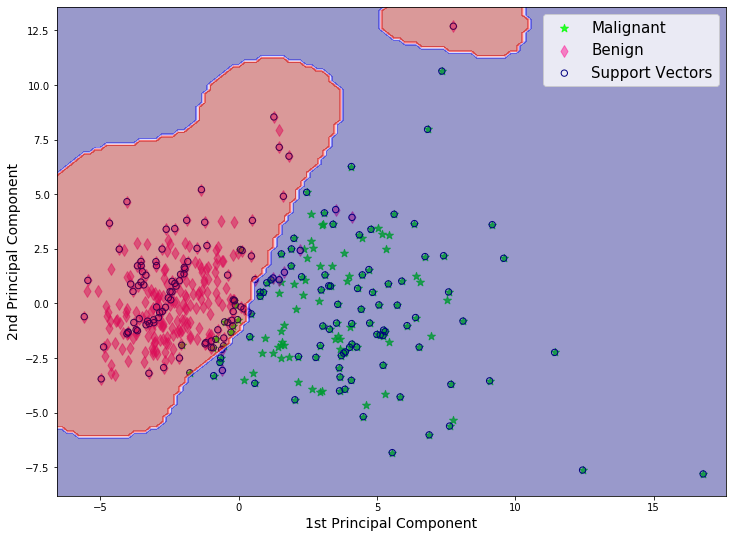

In [128]:
fig, ax = plt.subplots(figsize=(12,9))
fig.patch.set_facecolor('white')
cdict1={0:'lime',1:'deeppink'}

Y_tar_list = y_train.tolist()
yl1= [int(target1) for target1 in Y_tar_list]
labels1=yl1
 
labl1={0:'Malignant',1:'Benign'}
marker1={0:'*',1:'d'}
alpha1={0:.8, 1:0.5}

for l1 in np.unique(labels1):
    ix1=np.where(labels1==l1)
    ax.scatter(X0[ix1],X1[ix1], c=cdict1[l1],label=labl1[l1],s=70,marker=marker1[l1],alpha=alpha1[l1])

ax.scatter(svm_pca.classifiers.support_vectors_[:, 0], svm_pca.classifiers.support_vectors_[:, 1], s=40, facecolors='none', 
           edgecolors='navy', label='Support Vectors')

draw_contours(ax, svm_pca, xx, yy,cmap='seismic', alpha=0.4)
plt.legend(fontsize=15)

plt.xlabel("1st Principal Component",fontsize=14)
plt.ylabel("2nd Principal Component",fontsize=14)
plt.show()